In [1]:
# libabries for data exploration.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helpful_functions import MLFunctions
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [2]:
# load sales data.
sales = pd.read_csv("../../../Data/future_sales/sales_train.csv")

In [3]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
sales.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [7]:
# use MLfunction class to convert date to equivalent numeric values.
user_function = MLFunctions(sales)
date_num = user_function.dateNum()

In [8]:
# create new column with numeric values equivalent to dates. 
sales["date_num"] = date_num

In [9]:
train_set, test_set = train_test_split(sales, test_size=0.2, random_state=44)

In [10]:
exploration_data = train_set.copy()
exploration_data["total_sales"] = exploration_data["item_price"] * exploration_data["item_cnt_day"]

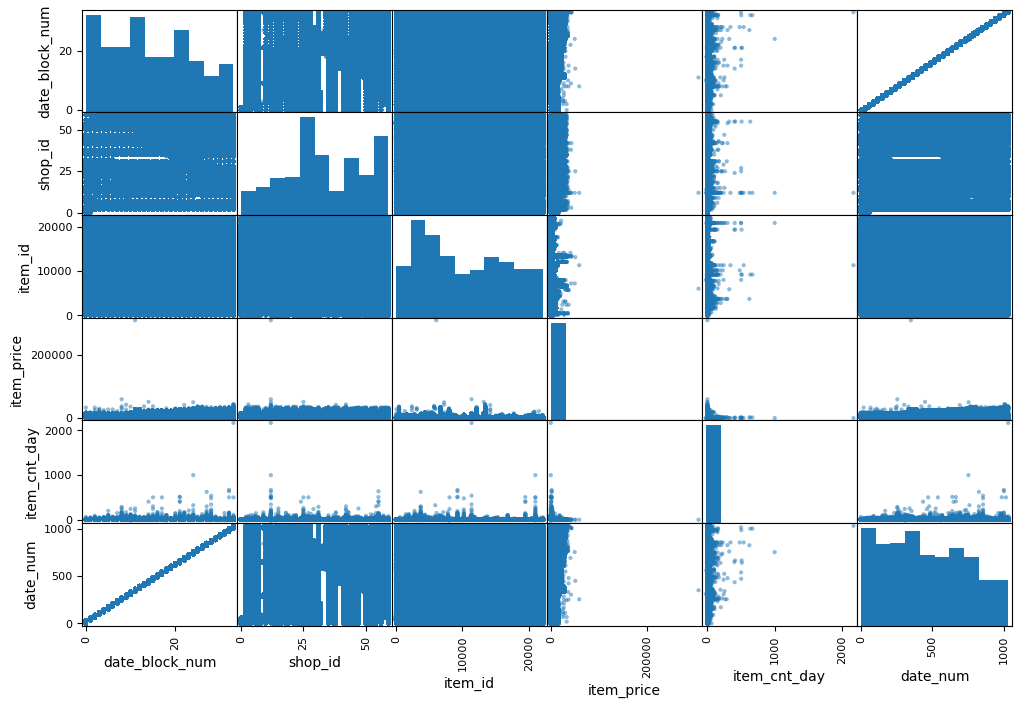

In [11]:
attributes = ["date_block_num", "shop_id", "item_id", "item_price", "item_cnt_day", "date_num"]
scatter_matrix(exploration_data[attributes], figsize=(12, 8))
plt.show()

In [12]:
total_sales_month = exploration_data.groupby(by="date_block_num")["total_sales"].sum()

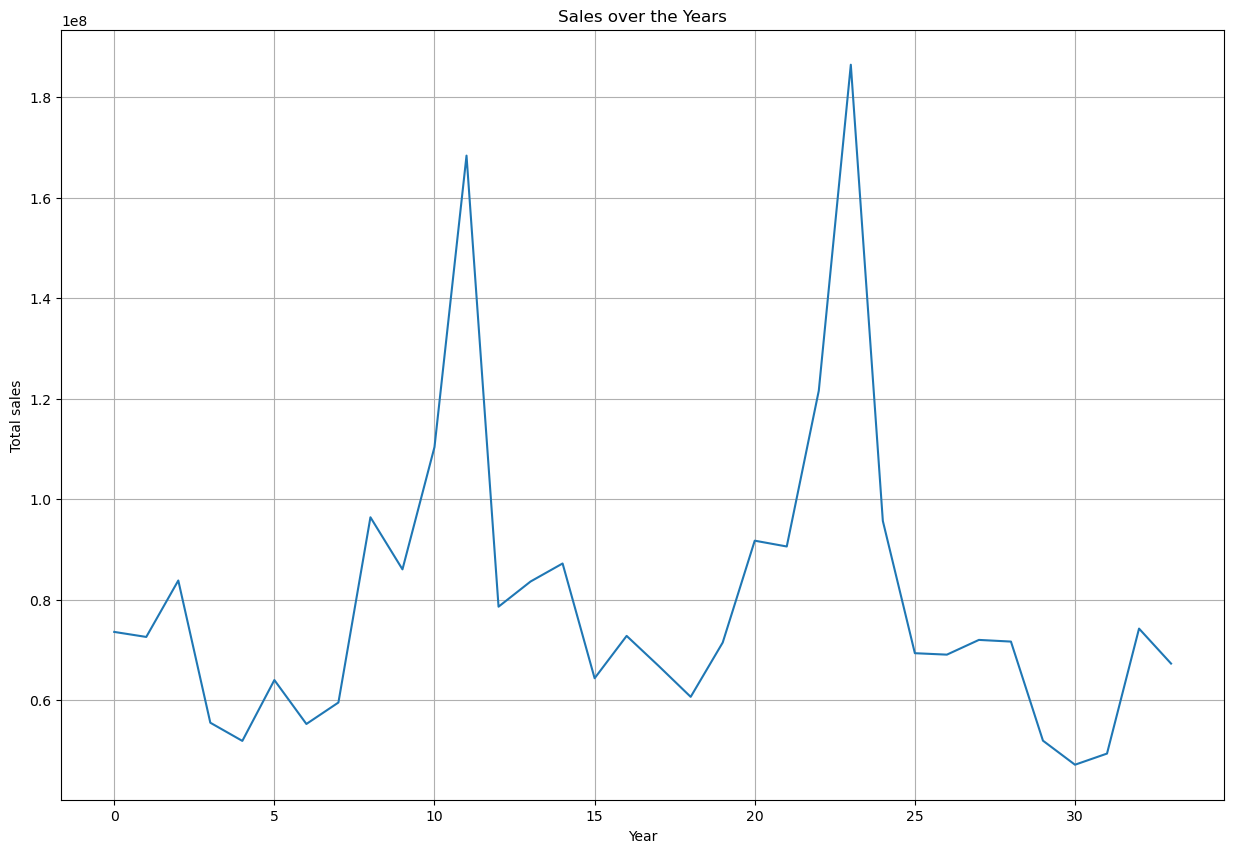

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(total_sales_month)
ax.set_title("Sales over the Years")
ax.set_xlabel("Year")
ax.set_ylabel("Total sales")
ax.grid()
plt.show()

In [14]:
total_items_month = exploration_data.groupby(by="date_block_num")["item_cnt_day"].sum()

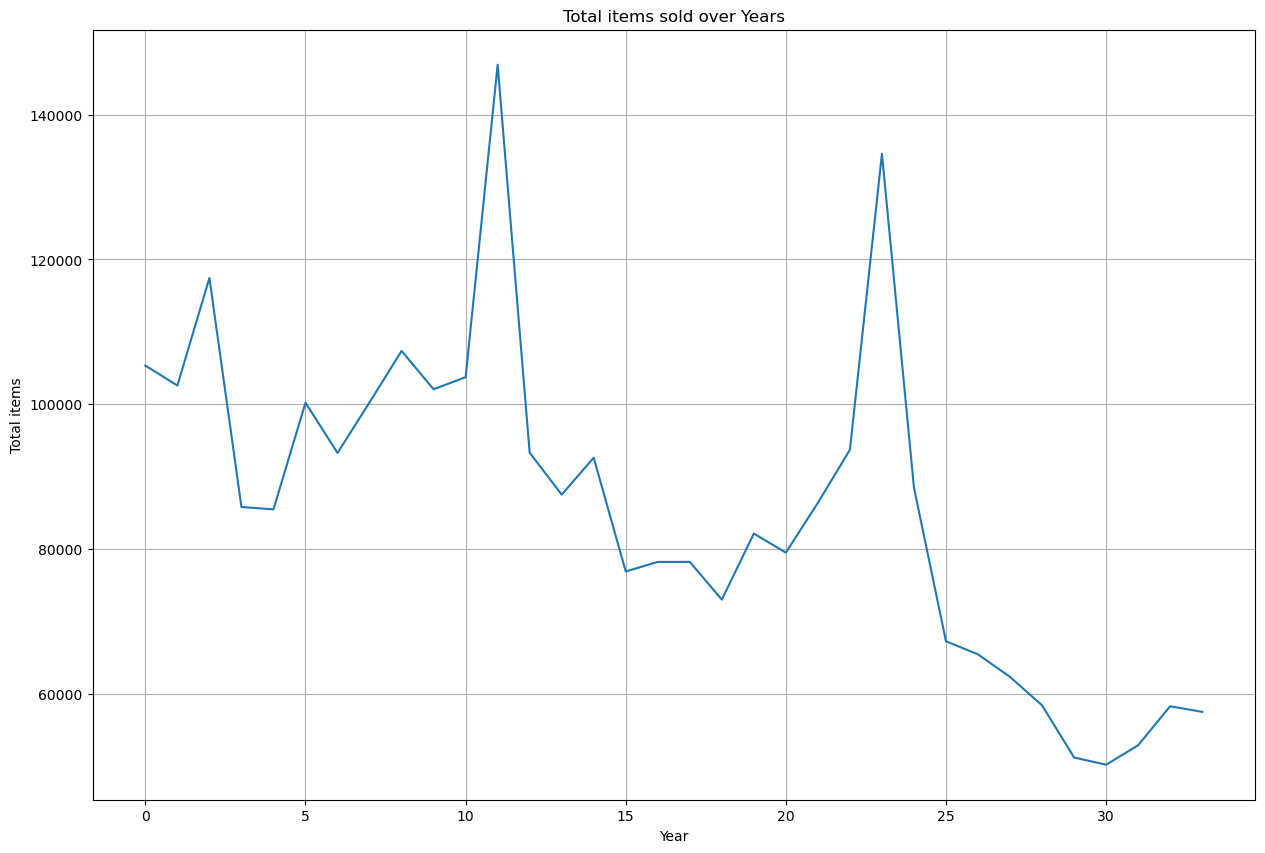

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(total_items_month)
ax.set_title("Total items sold over Years")
ax.set_xlabel("Year")
ax.set_ylabel("Total items")
ax.grid()
plt.show()

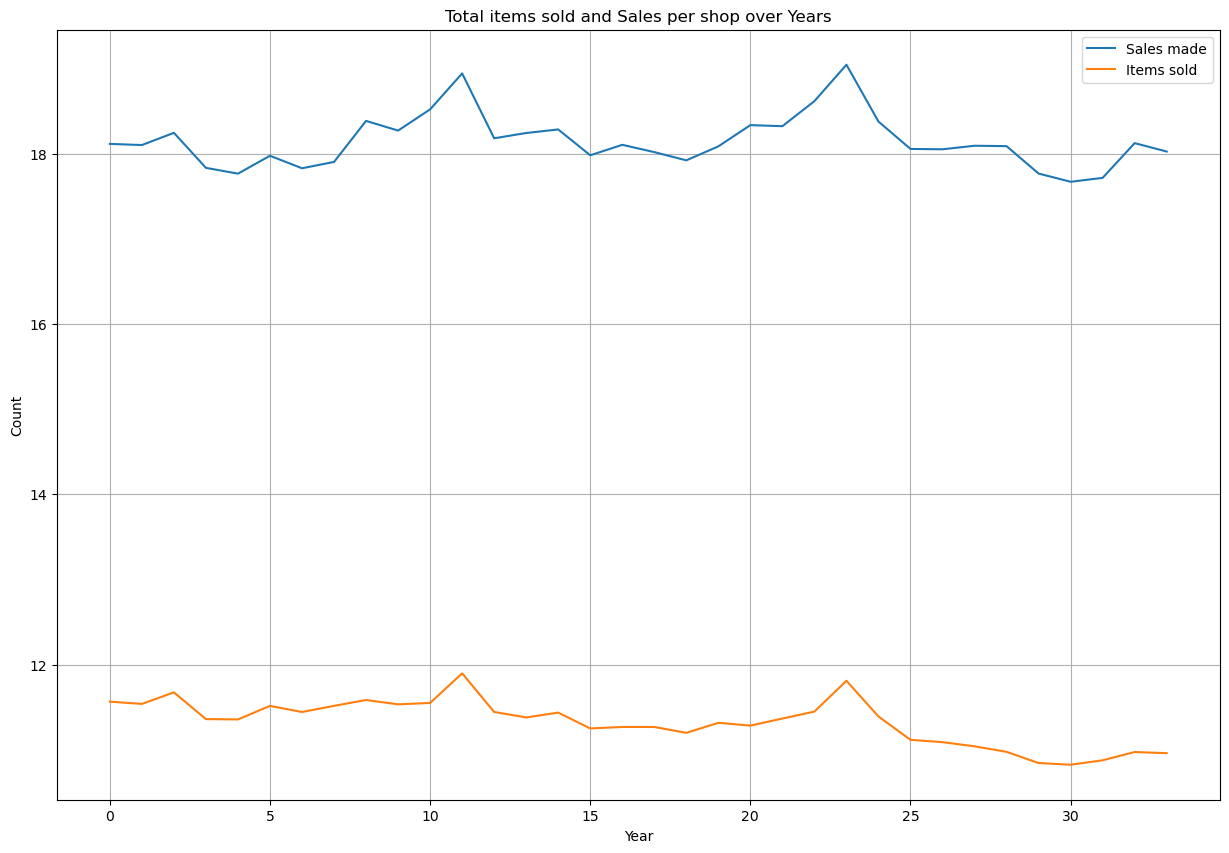

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(np.log(total_sales_month), label="Sales made")
ax.plot(np.log(total_items_month), label="Items sold")
ax.set_title("Total items sold and Sales per shop over Years")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.legend()
ax.grid()
plt.show()

In [17]:
total_shops_month = exploration_data.groupby(by="shop_id")["total_sales"].sum()

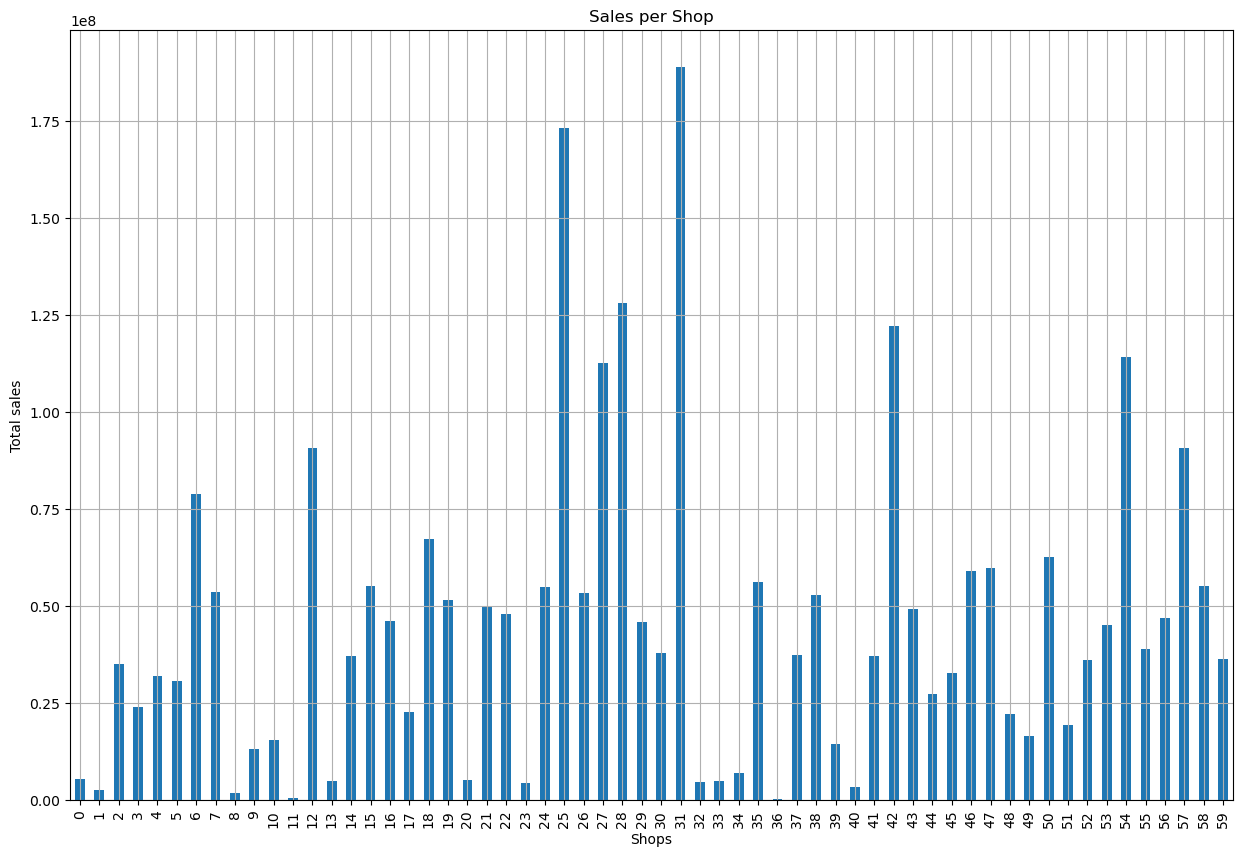

In [18]:
total_shops_month.plot(kind="bar",
                       title="Sales per Shop",
                       xlabel="Shops",
                       ylabel="Total sales",
                       figsize=(15, 10),
                       grid=True
                      )
plt.show()